In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn .metrics import accuracy_score
from sklearn. model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
import numpy as np
import seaborn as sns
import matplotlib. pyplot as plt

In [8]:
df=pd. read_csv('weather.csv')

In [9]:
df.head ()

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-2012,0.0,12.8,5.0,4.7,drizzle
1,02-01-2012,10.9,10.6,2.8,4.5,rain
2,03-01-2012,0.8,11.7,7.2,2.3,rain
3,04-01-2012,20.3,12.2,5.6,4.7,rain
4,05-01-2012,1.3,8.9,2.8,6.1,rain


In [10]:
df.shape

(1461, 6)

<Axes: xlabel='weather', ylabel='count'>

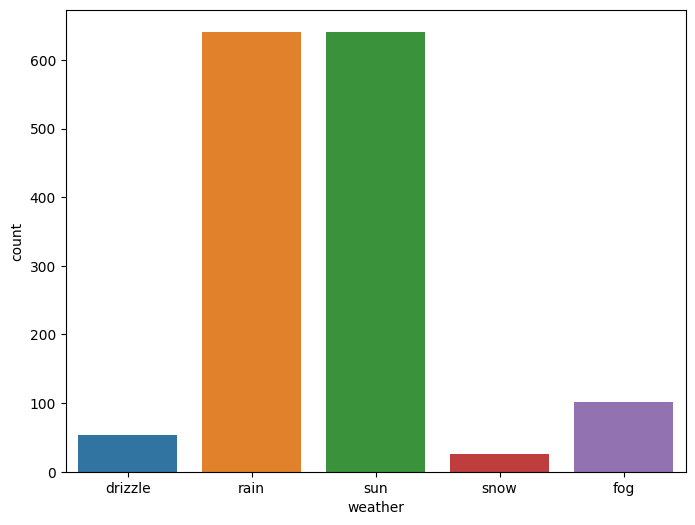

In [11]:
plt.figure (figsize=(8,6))
sns.countplot (data=df, x=df.weather)

In [12]:
df=df.drop(columns=['date'])

In [13]:
x=df.drop('weather', axis=1)

In [14]:
y=df.weather

In [15]:
rfc=RandomForestClassifier(n_estimators=15,random_state=42)
knn=KNeighborsClassifier(n_neighbors=10)
gbc=GradientBoostingClassifier()

estimaters=[('rfc',rfc),('knn',knn),('gbc',gbc)]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=8)

In [17]:
model=StackingClassifier(
    estimators=estimaters,
    final_estimator=LogisticRegression(),
)

In [18]:
model.fit(x_train,y_train)

StackingClassifier(estimators=[('rfc',
                                RandomForestClassifier(n_estimators=15,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('gbc', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [19]:
y_predict=model.predict(x_test)

In [20]:
accuracy_score(y_predict,y_test)

0.8361774744027304

In [21]:
precipitation=float(input('Enter the precipitation value: '))
temp_max=float(input('Enter the maximum temperature: '))
temp_min=float(input('Enter the minimum temperature: '))
wind=float(input('enter the wind value: '))
model.predict([[precipitation,temp_max,temp_min,wind]])

Enter the precipitation value: 1
Enter the maximum temperature: 2
Enter the minimum temperature: 3
enter the wind value: 4


C:\Users\91639\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91639\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\91639\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array(['rain'], dtype=object)